In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

plt.rcParams["figure.figsize"]=[15,6]

In [2]:
df=pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [5]:
df=df.drop("Unnamed: 0", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#for airline

df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [8]:
#for flight

df["flight"].unique() #these are unique ID codes 

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [9]:
df["flight"].nunique() #1561 flight codes - can segreggate with flights

1561

In [10]:
df[df["airline"]=="Vistara"]["flight"].unique()

array(['UK-995', 'UK-963', 'UK-945', 'UK-927', 'UK-951', 'UK-933',
       'UK-813', 'UK-817', 'UK-819', 'UK-801', 'UK-815', 'UK-955',
       'UK-627', 'UK-899', 'UK-747', 'UK-809', 'UK-737', 'UK-871',
       'UK-977', 'UK-637', 'UK-835', 'UK-705', 'UK-707', 'UK-673',
       'UK-879', 'UK-837', 'UK-985', 'UK-953', 'UK-683', 'UK-859',
       'UK-829', 'UK-706', 'UK-839', 'UK-833', 'UK-847', 'UK-855',
       'UK-981', 'UK-975', 'UK-993', 'UK-943', 'UK-941', 'UK-811',
       'UK-807', 'UK-727', 'UK-812', 'UK-671', 'UK-741', 'UK-721',
       'UK-641', 'UK-994', 'UK-910', 'UK-958', 'UK-960', 'UK-940',
       'UK-944', 'UK-996', 'UK-988', 'UK-651', 'UK-863', 'UK-851',
       'UK-613', 'UK-875', 'UK-852', 'UK-853', 'UK-773', 'UK-771',
       'UK-825', 'UK-775', 'UK-970', 'UK-928', 'UK-823', 'UK-621',
       'UK-865', 'UK-841', 'UK-877', 'UK-655', 'UK-954', 'UK-930',
       'UK-986', 'UK-950', 'UK-902', 'UK-653', 'UK-873', 'UK-849',
       'UK-845', 'UK-857', 'UK-821', 'UK-827', 'UK-861', 'UK-8

In [11]:
df[df["airline"]=="AirAsia"]["flight"].unique()

array(['I5-764', 'I5-747', 'I5-744', 'I5-784', 'I5-721', 'I5-773',
       'I5-740', 'I5-482', 'I5-1529', 'I5-741', 'I5-788', 'I5-798',
       'I5-775', 'I5-881', 'I5-735', 'I5-548', 'I5-767', 'I5-792',
       'I5-783', 'I5-710', 'I5-711', 'I5-768', 'I5-779', 'I5-787',
       'I5-550', 'I5-791', 'I5-713', 'I5-559', 'I5-829', 'I5-737',
       'I5-942', 'I5-631', 'I5-620', 'I5-330', 'I5-1569', 'I5-471',
       'I5-678', 'I5-336', 'I5-941', 'I5-338', 'I5-423', 'I5-996',
       'I5-1566', 'I5-1528', 'I5-749', 'I5-1982', 'I5-1426', 'I5-2392',
       'I5-592', 'I5-992', 'I5-1229', 'I5-892', 'I5-589', 'I5-1621',
       'I5-819', 'I5-1782', 'I5-410', 'I5-1780', 'I5-2472', 'I5-972',
       'I5-5405', 'I5-5402', 'I5-1321', 'I5-722', 'I5-818', 'I5-1427',
       'I5-991', 'I5-1561', 'I5-820', 'I5-2461', 'I5-1451', 'I5-1783',
       'I5-1576', 'I5-1228', 'I5-1983', 'I5-1731', 'I5-1562', 'I5-339',
       'I5-1540', 'I5-1530', 'I5-334', 'I5-736', 'I5-1622', 'I5-1454',
       'I5-1564', 'I5-5204', 'I5-

In [12]:
df[df["airline"]=="SpiceJet"]["flight"].unique()

array(['SG-8709', 'SG-8157', 'SG-8169', 'SG-2976', 'SG-339', 'SG-3002',
       'SG-8803', 'SG-2277', 'SG-8483', 'SG-1089', 'SG-1061', 'SG-1063',
       'SG-1091', 'SG-8339', 'SG-9974', 'SG-8723', 'SG-8701', 'SG-2643',
       'SG-191', 'SG-8185', 'SG-8946', 'SG-143', 'SG-8938', 'SG-8721',
       'SG-8645', 'SG-8171', 'SG-8411', 'SG-8207', 'SG-5007', 'SG-6001',
       'SG-534', 'SG-5012', 'SG-8941', 'SG-8910', 'SG-480', 'SG-8191',
       'SG-8905', 'SG-197', 'SG-389', 'SG-946', 'SG-8480', 'SG-8253',
       'SG-8903', 'SG-8187', 'SG-8152', 'SG-8106', 'SG-8263', 'SG-1072',
       'SG-1074', 'SG-263', 'SG-292', 'SG-8195', 'SG-958', 'SG-6027',
       'SG-8968', 'SG-8107', 'SG-1071', 'SG-1056', 'SG-8193', 'SG-8913',
       'SG-8103', 'SG-107', 'SG-8710', 'SG-8158', 'SG-4417', 'SG-349',
       'SG-2697', 'SG-8702', 'SG-276', 'SG-1092', 'SG-1090', 'SG-1062',
       'SG-343', 'SG-1059', 'SG-8179', 'SG-223', 'SG-455', 'SG-488',
       'SG-475', 'SG-9923', 'SG-415', 'SG-634', 'SG-3440', 'SG-467',


In [13]:
df[df["airline"]=="GO_FIRST"]["flight"].unique()

array(['G8-334', 'G8-336', 'G8-392', 'G8-338', 'G8-266', 'G8-101',
       'G8-103', 'G8-165', 'G8-237', 'G8-1404', 'G8-191', 'G8-213',
       'G8-346', 'G8-330', 'G8-323', 'G8-188', 'G8-719', 'G8-119',
       'G8-717', 'G8-286', 'G8-113', 'G8-300', 'G8-1010', 'G8-357',
       'G8-199', 'G8-2401', 'G8-7533', 'G8-7534', 'G8-7535', 'G8-530',
       'G8-354', 'G8-2501', 'G8-211', 'G8-7553', 'G8-2509', 'G8-194',
       'G8-2609', 'G8-713', 'G8-7541', 'G8-2403', 'G8-203', 'G8-209',
       'G8-268', 'G8-207', 'G8-404', 'G8-105', 'G8-2511', 'G8-143',
       'G8-108', 'G8-107', 'G8-2513', 'G8-131', 'G8-133', 'G8-171',
       'G8-173', 'G8-275', 'G8-422', 'G8-7549', 'G8-231', 'G8-7555',
       'G8-145', 'G8-7542', 'G8-1171', 'G8-2201', 'G8-153', 'G8-423',
       'G8-151', 'G8-339', 'G8-351', 'G8-287', 'G8-349', 'G8-329',
       'G8-327', 'G8-319', 'G8-322', 'G8-365', 'G8-387', 'G8-520',
       'G8-511', 'G8-364', 'G8-382', 'G8-575', 'G8-331', 'G8-391',
       'G8-383', 'G8-381', 'G8-2440', 'G8-2

In [14]:
df[df["airline"]=="Air_India"]["flight"].unique()

array(['AI-887', 'AI-665', 'AI-441', 'AI-453', 'AI-504', 'AI-502',
       'AI-506', 'AI-803', 'AI-479', 'AI-9643', 'AI-540', 'AI-429',
       'AI-439', 'AI-9645', 'AI-764', 'AI-762', 'AI-512', 'AI-537',
       'AI-801', 'AI-531', 'AI-839', 'AI-767', 'AI-401', 'AI-473',
       'AI-409', 'AI-877', 'AI-868', 'AI-805', 'AI-624', 'AI-636',
       'AI-469', 'AI-542', 'AI-560', 'AI-403', 'AI-9843', 'AI-544',
       'AI-9857', 'AI-885', 'AI-465', 'AI-406', 'AI-9809', 'AI-411',
       'AI-475', 'AI-9911', 'AI-807', 'AI-811', 'AI-431', 'AI-678',
       'AI-435', 'AI-499', 'AI-9887', 'AI-483', 'AI-451', 'AI-471',
       'AI-481', 'AI-9939', 'AI-9915', 'AI-415', 'AI-423', 'AI-865',
       'AI-485', 'AI-837', 'AI-491', 'AI-883', 'AI-9609', 'AI-9015',
       'AI-9017', 'AI-861', 'AI-437', 'AI-641', 'AI-407', 'AI-487',
       'AI-459', 'AI-467', 'AI-889', 'AI-891', 'AI-879', 'AI-9991',
       'AI-895', 'AI-489', 'AI-493', 'AI-888', 'AI-867', 'AI-660',
       'AI-442', 'AI-631', 'AI-639', 'AI-649', 'A

In [15]:
df[df["airline"]=="Indigo"]["flight"].unique()

array(['6E-5001', '6E-6202', '6E-549', '6E-6278', '6E-5328', '6E-2046',
       '6E-5041', '6E-2373', '6E-2193', '6E-2168', '6E-152', '6E-369',
       '6E-2338', '6E-184', '6E-2102', '6E-218', '6E-6722', '6E-2022',
       '6E-2154', '6E-282', '6E-607', '6E-5018', '6E-181', '6E-2092',
       '6E-5063', '6E-7403', '6E-2054', '6E-2137', '6E-2097', '6E-926',
       '6E-2083', '6E-5088', '6E-2901', '6E-6261', '6E-2013', '6E-171',
       '6E-2042', '6E-5329', '6E-2081', '6E-573', '6E-865', '6E-2033',
       '6E-6245', '6E-5042', '6E-2519', '6E-153', '6E-5026', '6E-5087',
       '6E-736', '6E-6939', '6E-6231', '6E-212', '6E-7336', '6E-6098',
       '6E-698', '6E-7348', '6E-2274', '6E-2176', '6E-864', '6E-2026',
       '6E-5175', '6E-2188', '6E-654', '6E-2028', '6E-2471', '6E-186',
       '6E-2147', '6E-198', '6E-6205', '6E-2247', '6E-2005', '6E-2914',
       '6E-788', '6E-2616', '6E-2336', '6E-2131', '6E-221', '6E-2331',
       '6E-2769', '6E-5059', '6E-7407', '6E-2036', '6E-772', '6E-967',
  

In [16]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [17]:
df["source_city"].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [18]:
pd.crosstab(df["airline"], df["source_city"])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3364,1498,4387,1844,2829,2176
Air_India,12052,9912,17063,11088,12400,18377
GO_FIRST,4498,1289,5724,2504,3590,5568
Indigo,7080,6746,8277,6215,7296,7506
SpiceJet,1255,1219,2524,332,1947,1734
Vistara,23812,18036,23368,18823,18285,25535


<AxesSubplot:xlabel='airline'>

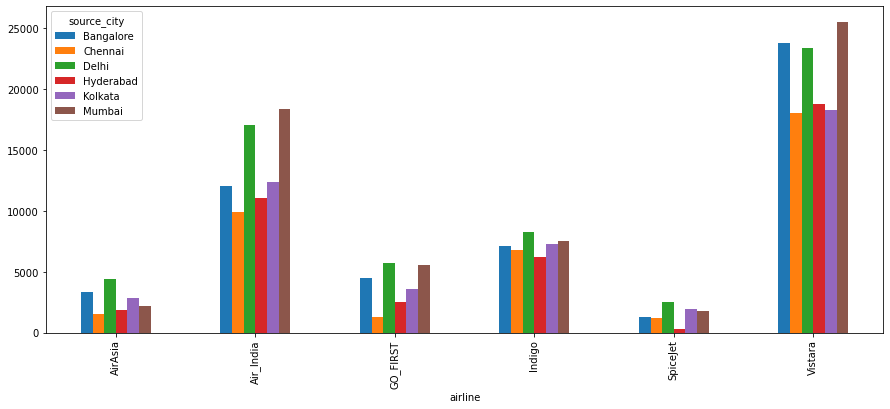

In [19]:
pd.crosstab(df["airline"], df["source_city"]).plot(kind="bar")

In [20]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
df["departure_time"].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [22]:
df["departure_time"].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [23]:
pd.crosstab(df["airline"], df["departure_time"])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
airline,,,,,,
AirAsia,3078,3692,3657,143,2348,3180
Air_India,10876,19867,18626,291,17768,13464
GO_FIRST,4942,6103,4904,146,4116,2962
Indigo,10155,8184,8460,726,11491,4104
SpiceJet,1193,2728,2031,0,1519,1540
Vistara,17550,26216,27424,0,33904,22765


In [24]:
pd.crosstab(df["source_city"], df["departure_time"])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


In [25]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
df["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [27]:
pd.crosstab(df["airline"], df["stops"])

stops,one,two_or_more,zero
airline,,,
AirAsia,11418,2246,2434
Air_India,71004,3479,6409
GO_FIRST,19545,405,3223
Indigo,31166,738,11216
SpiceJet,6549,0,2462
Vistara,111181,6418,10260


In [28]:
pd.crosstab(df["departure_time"], df["stops"])

stops,one,two_or_more,zero
departure_time,,,
Afternoon,40402,2743,4649
Early_Morning,54821,3709,8260
Evening,53390,2361,9351
Late_Night,849,40,417
Morning,60574,3930,6642
Night,40827,503,6685


In [29]:
pd.crosstab(df["source_city"], df["stops"])

stops,one,two_or_more,zero
source_city,,,
Bangalore,43998,2193,5870
Chennai,33225,1701,3774
Delhi,48327,2926,10090
Hyderabad,35440,1368,3998
Kolkata,39327,2767,4253
Mumbai,50546,2331,8019


In [30]:
#arrival_time

df["arrival_time"].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [31]:
pd.crosstab(df["source_city"], df["arrival_time"])

arrival_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,6992,3154,14493,2673,10411,14338
Chennai,5152,1606,10830,1999,7106,12007
Delhi,8007,5262,14630,2143,13007,18294
Hyderabad,4816,1581,10539,2092,8854,12924
Kolkata,5941,2156,11304,2414,9595,14937
Mumbai,7231,1658,16527,2680,13762,19038


In [32]:
pd.crosstab(df["departure_time"], df["arrival_time"])

arrival_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
departure_time,,,,,,
Afternoon,3823,1228,12862,3052,5914,20915
Early_Morning,12435,3185,18866,800,13343,18161
Evening,5407,4626,13003,5644,17498,18924
Late_Night,73,501,94,137,395,106
Morning,10624,1654,24289,1390,9509,23680
Night,5777,4223,9209,2978,16076,9752


In [33]:
pd.crosstab(df["airline"], df["arrival_time"])

arrival_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
airline,,,,,,
AirAsia,2052,1407,2762,3491,2909,3477
Air_India,11576,3405,18748,2090,20521,24552
GO_FIRST,3373,2705,4503,2778,2761,7053
Indigo,7367,2537,11591,3455,5469,12701
SpiceJet,844,721,1403,456,2525,3062
Vistara,12927,4642,39316,1731,28550,40693


In [34]:
pd.crosstab(df["arrival_time"], df["stops"])

stops,one,two_or_more,zero
arrival_time,,,
Afternoon,31721,1000,5418
Early_Morning,12490,634,2293
Evening,68068,4024,6231
Late_Night,11162,656,2183
Morning,51026,2371,9338
Night,76396,4601,10541


In [35]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [36]:
df["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [37]:
pd.crosstab(df["airline"], df["destination_city"])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3437,1516,4433,1560,2789,2363
Air_India,11959,11141,14550,12022,13043,18177
GO_FIRST,4386,1488,5509,2576,3794,5420
Indigo,6772,6449,8133,6147,8437,7182
SpiceJet,1088,1172,2541,383,2054,1773
Vistara,23426,18602,22194,20038,19417,24182


In [38]:
pd.crosstab(df["departure_time"], df["destination_city"])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
departure_time,,,,,,
Afternoon,9366,6379,9065,6722,7799,8463
Early_Morning,10723,8620,12527,8911,10930,15079
Evening,10153,9659,11402,9889,11760,12239
Late_Night,143,121,374,67,370,231
Morning,12391,9462,14745,10173,10814,13561
Night,8292,6127,9247,6964,7861,9524


In [39]:
pd.crosstab(df["stops"], df["destination_city"])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
stops,,,,,,
one,42516,33316,46536,36578,42177,49740
two_or_more,2674,3239,785,2064,3195,1329
zero,5878,3813,10039,4084,4162,8028


In [40]:
pd.crosstab(df["arrival_time"], df["destination_city"])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
arrival_time,,,,,,
Afternoon,4827,2731,10206,6318,5540,8517
Early_Morning,1823,3481,536,3822,2377,3378
Evening,13937,9318,13940,10498,17917,12713
Late_Night,3176,975,6296,555,1230,1769
Morning,11246,10680,10338,7511,11982,10978
Night,16059,13183,16044,14022,10488,21742


In [41]:
pd.crosstab(df["source_city"], df["destination_city"])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0,6410,13756,8928,10028,12939
Chennai,6493,0,9783,6103,6983,9338
Delhi,14012,10780,0,9328,11934,15289
Hyderabad,7854,6395,8506,0,7987,10064
Kolkata,9824,6653,10506,7897,0,11467
Mumbai,12885,10130,14809,10470,12602,0


In [42]:
df["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [43]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
pd.crosstab(df["airline"], df["class"])

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


In [45]:
pd.crosstab(df["flight"], df["class"])

class,Business,Economy
flight,,
6E-102,0,39
6E-105,0,5
6E-113,0,49
6E-121,0,20
6E-123,0,5
...,...,...
UK-988,737,644
UK-993,456,455
UK-994,666,607


In [46]:
pd.crosstab(df["source_city"], df["class"])

class,Business,Economy
source_city,,
Bangalore,16441,35620
Chennai,12529,26171
Delhi,18316,43027
Hyderabad,12870,27936
Kolkata,13473,32874
Mumbai,19858,41038


In [47]:
pd.crosstab(df["departure_time"], df["class"])

class,Business,Economy
departure_time,,
Afternoon,12549,35245
Early_Morning,20102,46688
Evening,20895,44207
Late_Night,138,1168
Morning,22325,48821
Night,17478,30537


In [48]:
pd.crosstab(df["stops"], df["class"])

class,Business,Economy
stops,,
one,84302,166561
two_or_more,1083,12203
zero,8102,27902


In [49]:
pd.crosstab(df["arrival_time"], df["class"])

class,Business,Economy
arrival_time,,
Afternoon,10930,27209
Early_Morning,3514,11903
Evening,26399,51924
Late_Night,1833,12168
Morning,21786,40949
Night,29025,62513


In [50]:
pd.crosstab(df["destination_city"], df["class"])

class,Business,Economy
destination_city,,
Bangalore,16198,34870
Chennai,13158,27210
Delhi,16707,40653
Hyderabad,13675,29051
Kolkata,14758,34776
Mumbai,18991,40106


In [51]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [52]:
#univariate analysis

num=df.select_dtypes(include=np.number).columns
cat=df.select_dtypes(exclude=np.number).columns

In [53]:
#unique categories

for i in cat:
    print(i.upper())
    print(df[i].unique())

AIRLINE
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
FLIGHT
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
SOURCE_CITY
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
DEPARTURE_TIME
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
STOPS
['zero' 'one' 'two_or_more']
ARRIVAL_TIME
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
DESTINATION_CITY
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
CLASS
['Economy' 'Business']


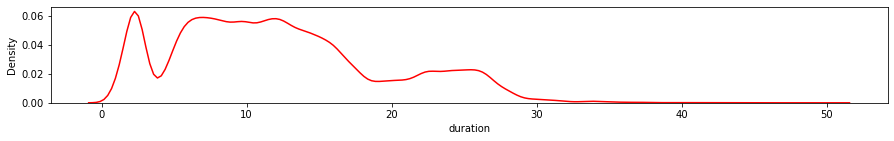

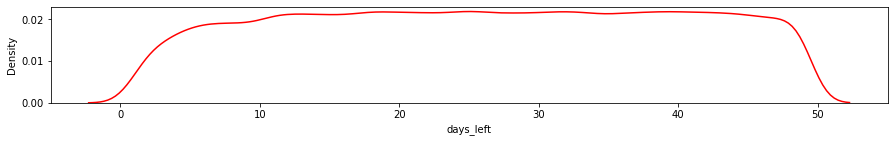

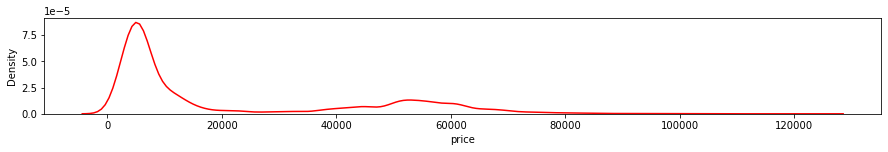

<Figure size 1080x432 with 0 Axes>

In [54]:
#univariate-num

nrows=3
ncols=1
iterator=1

for i in num:
    plt.subplot(nrows,ncols, iterator)
    sns.kdeplot(df[i], c="r")
    iterator+=1
    plt.show()
    
plt.tight_layout()

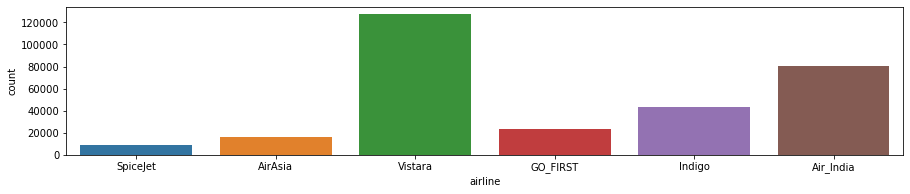

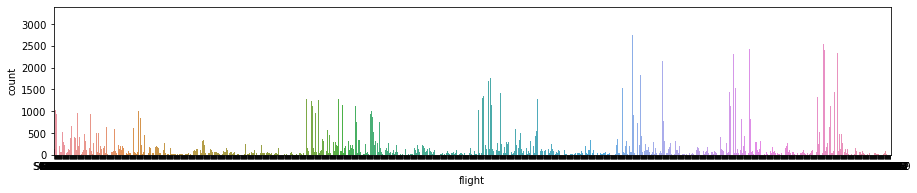

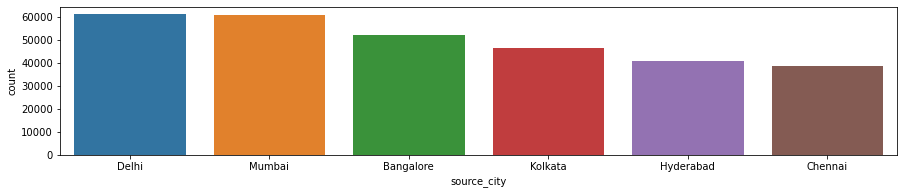

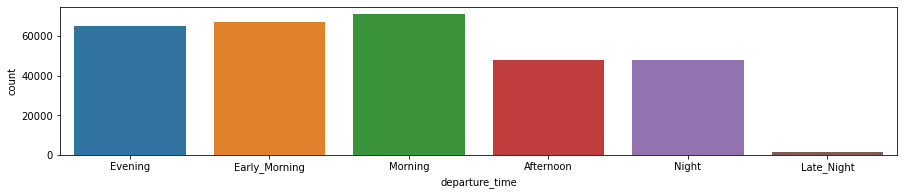

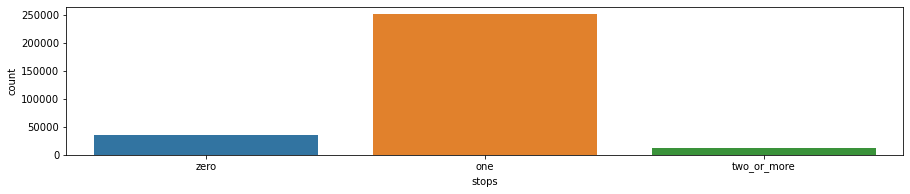

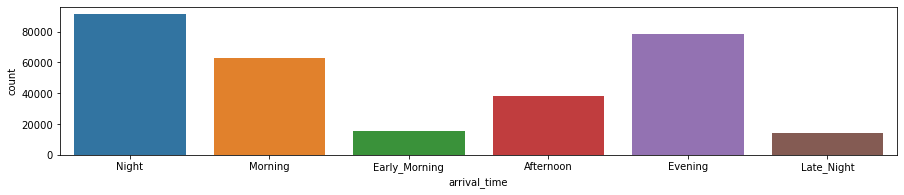

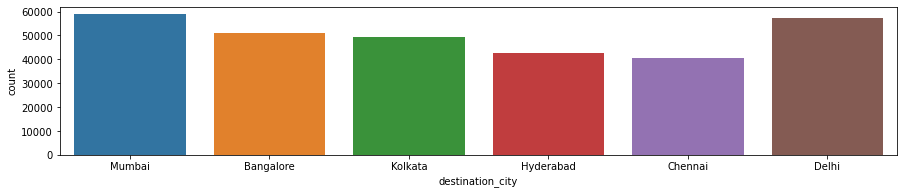

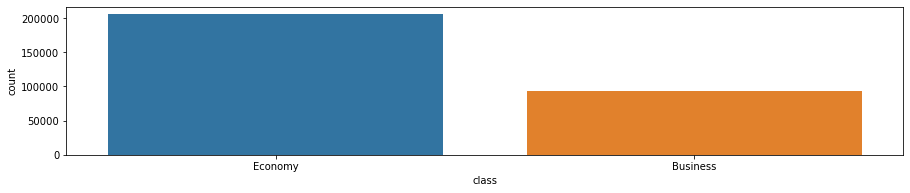

<Figure size 1080x432 with 0 Axes>

In [55]:
#univariate- cat

nrows=2
ncols=1
iterator=1

for i in cat:
    plt.subplot(nrows,ncols, iterator)
    sns.countplot(df[i])
    plt.show()
    
    
plt.tight_layout()

In [56]:
cat1=cat.drop(["flight"])
cat1

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

Text(0, 0.5, 'Price- Business Class')

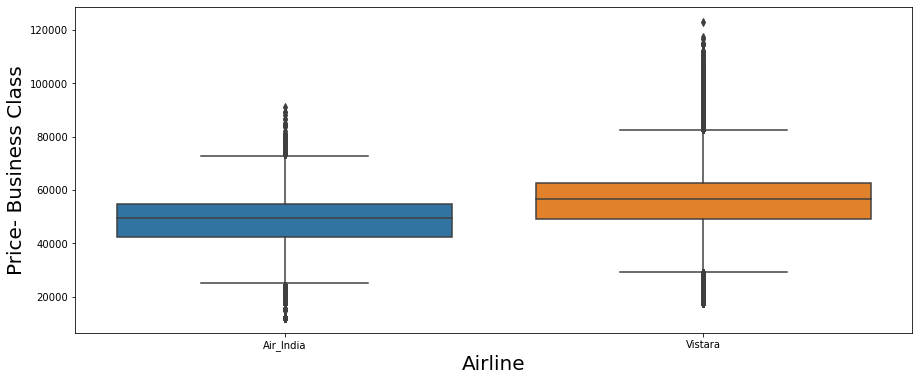

In [57]:
# price vs airline 
#business vs economy

sns.boxplot(df[df["class"]=="Business"]["airline"], df[df["class"]=="Business"]["price"])
plt.xlabel("Airline", fontsize=20)
plt.ylabel("Price- Business Class", fontsize=20)


Text(0, 0.5, 'Price- Economy Class')

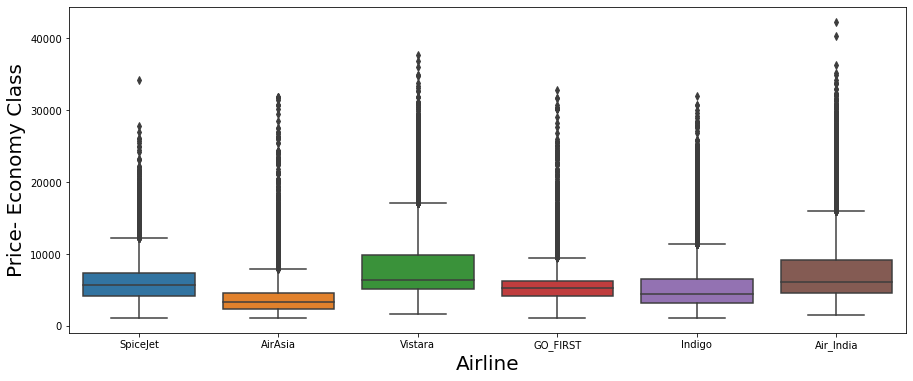

In [58]:
sns.boxplot(df[df["class"]=="Economy"]["airline"], df[df["class"]=="Economy"]["price"])
plt.xlabel("Airline", fontsize=20)
plt.ylabel("Price- Economy Class", fontsize=20)


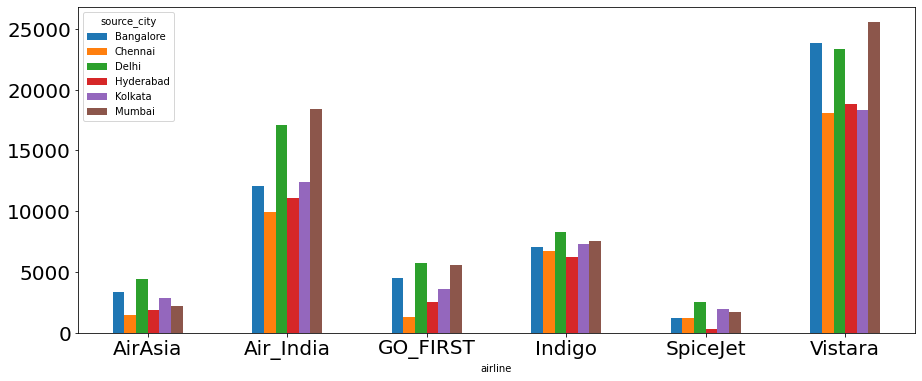

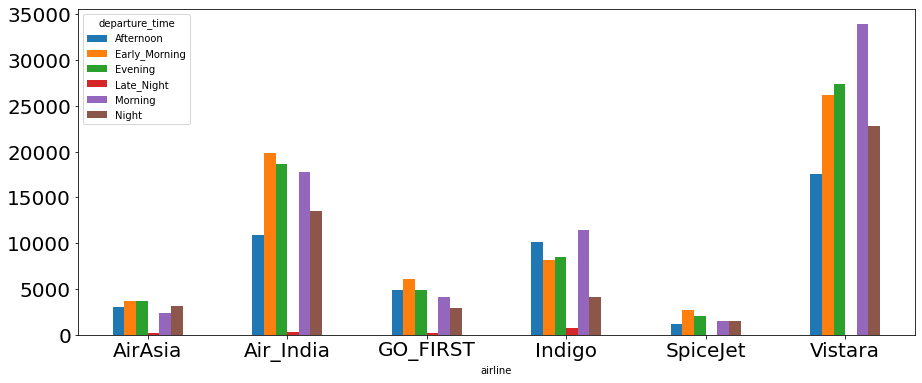

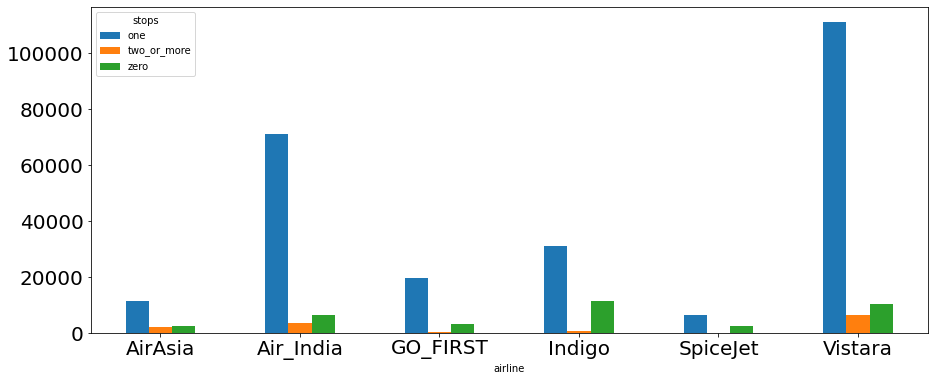

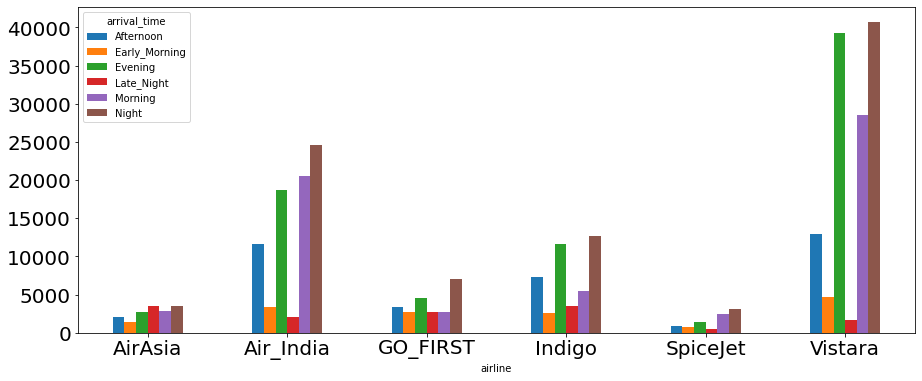

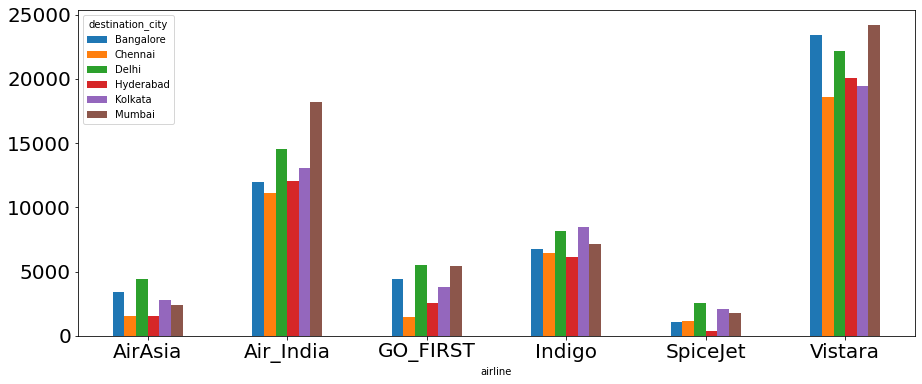

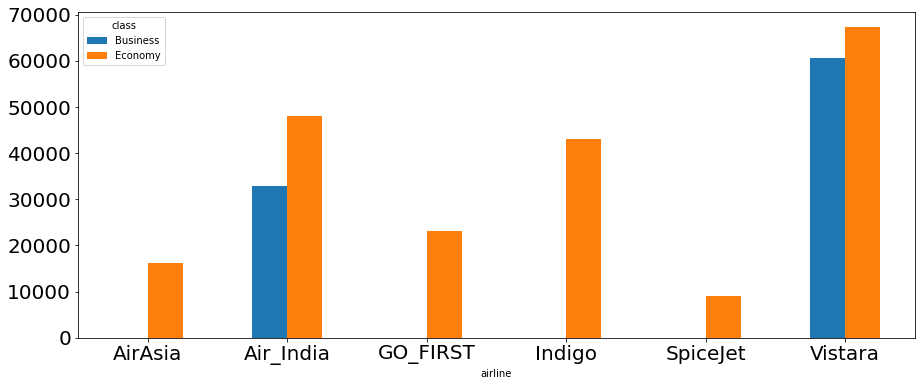

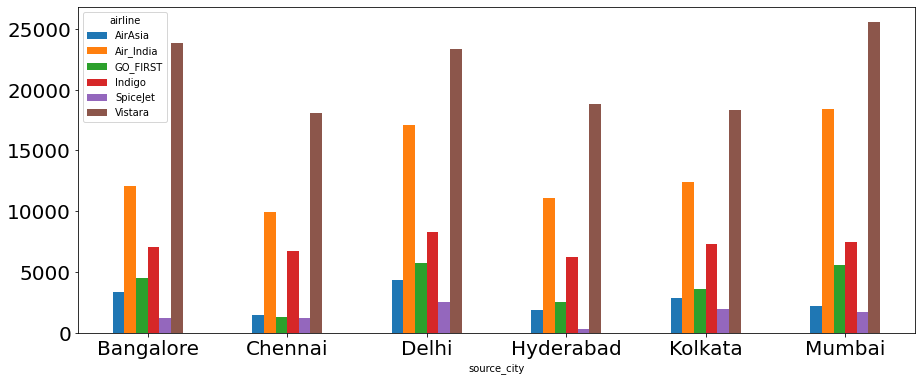

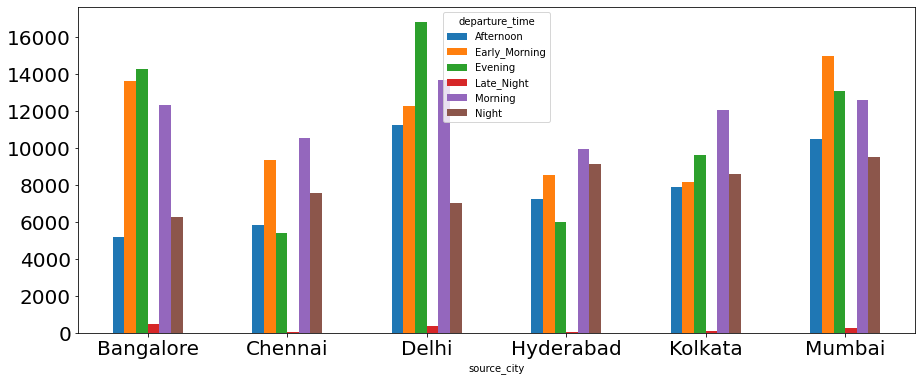

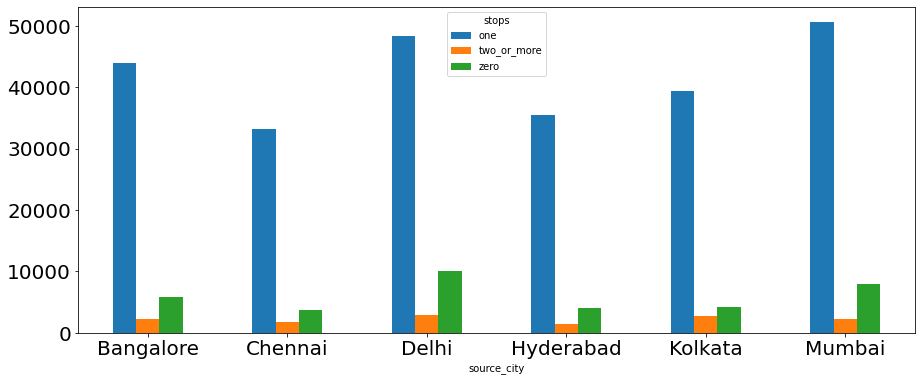

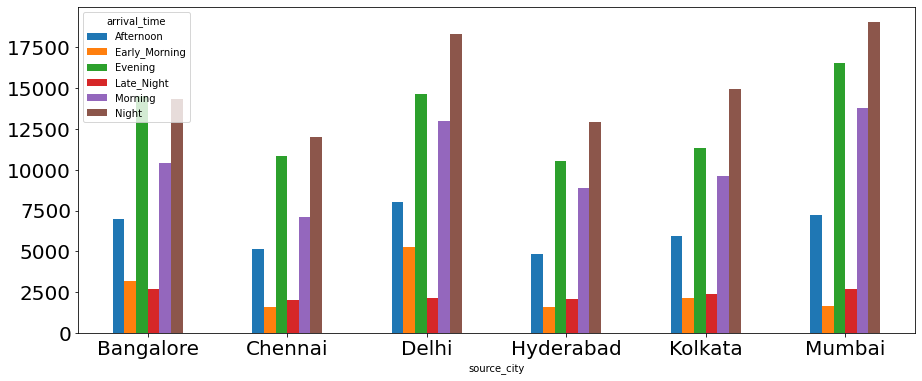

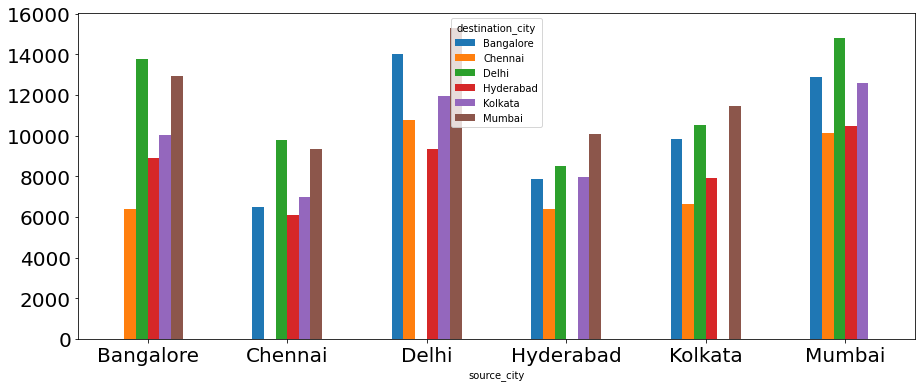

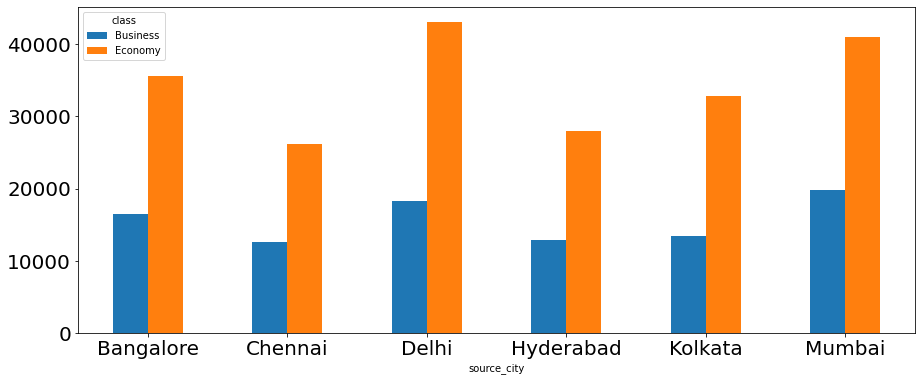

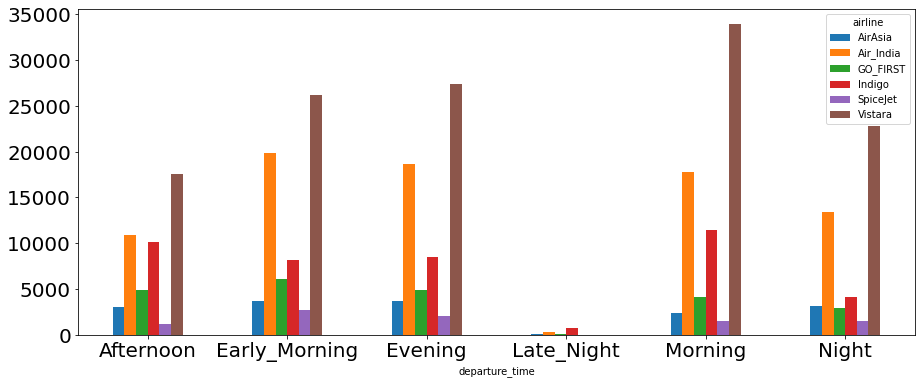

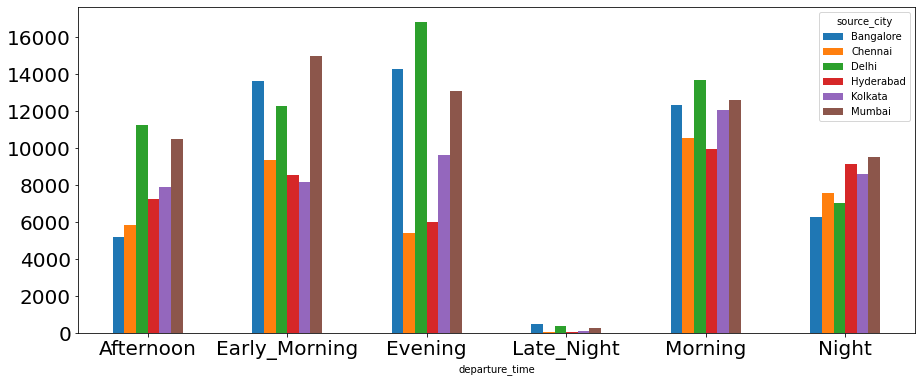

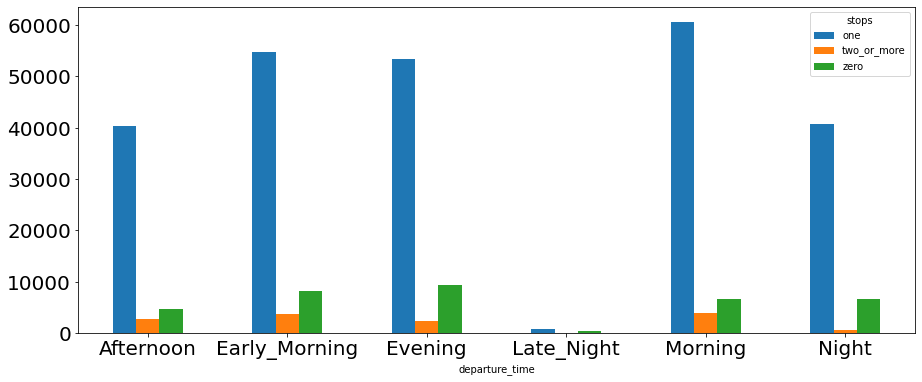

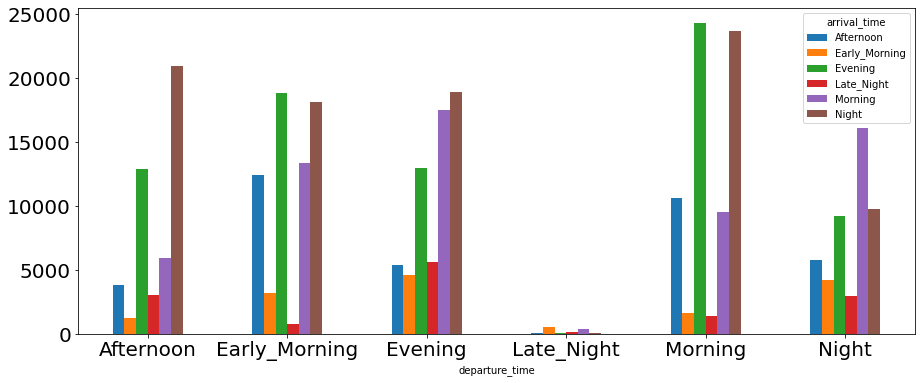

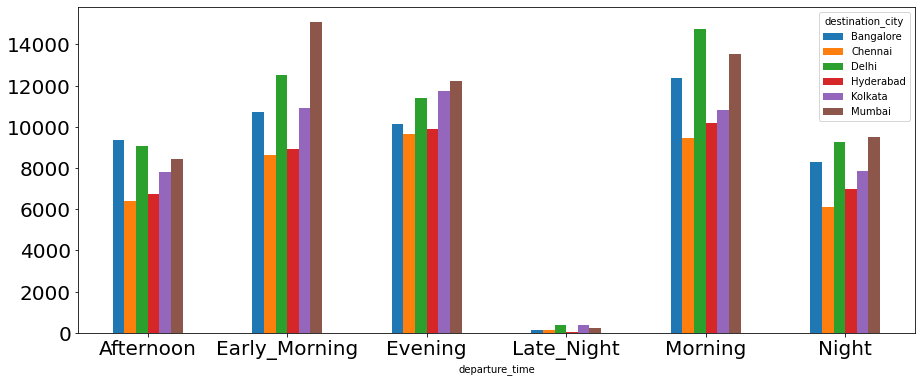

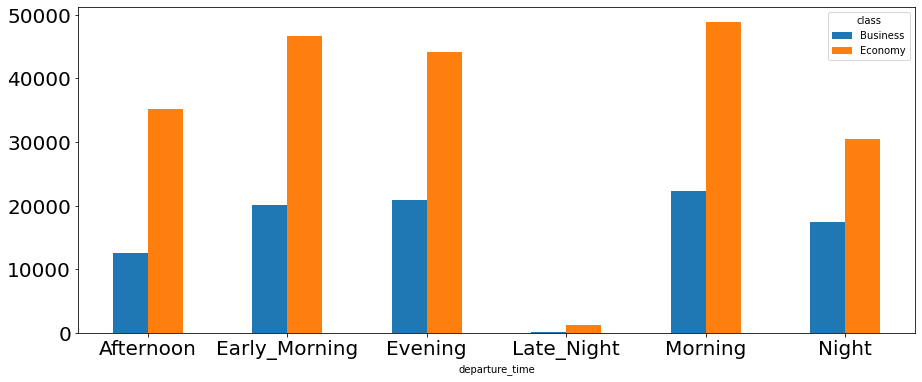

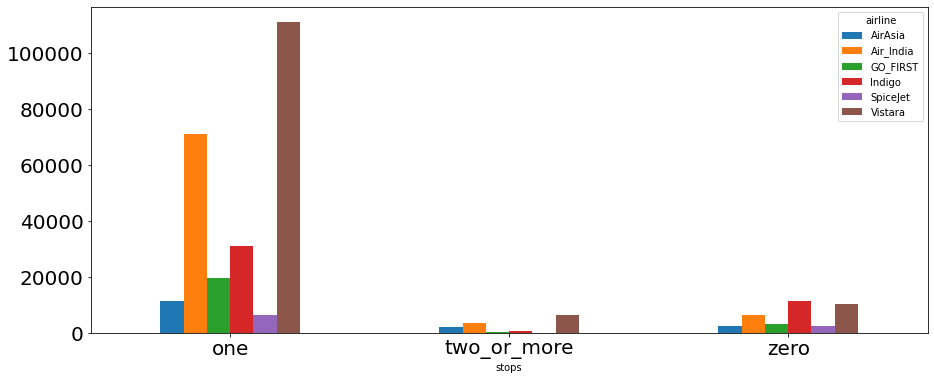

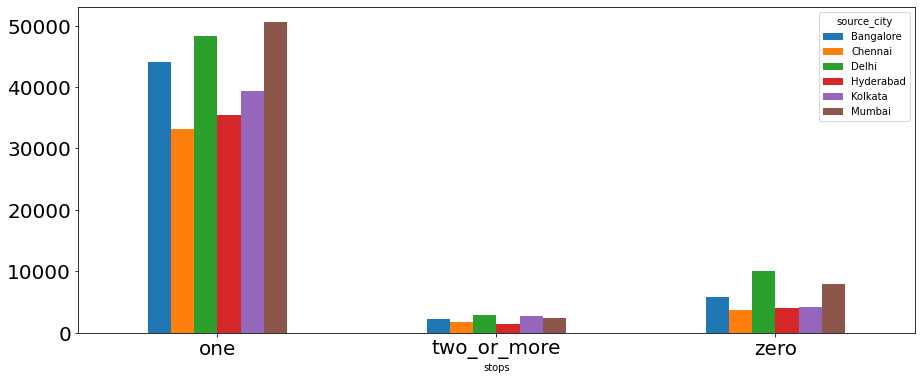

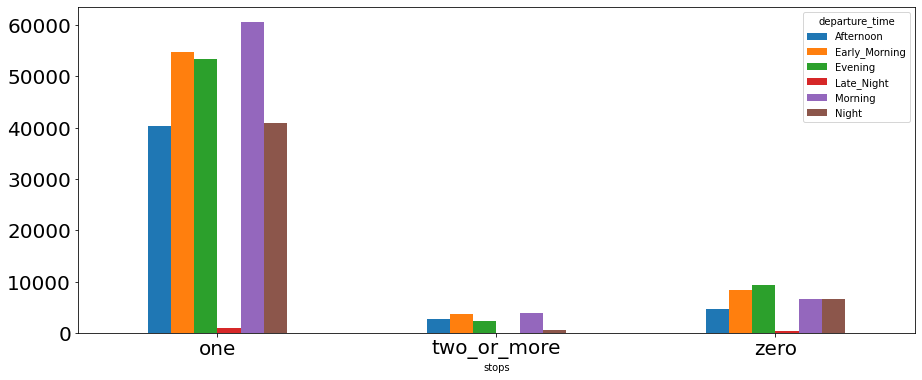

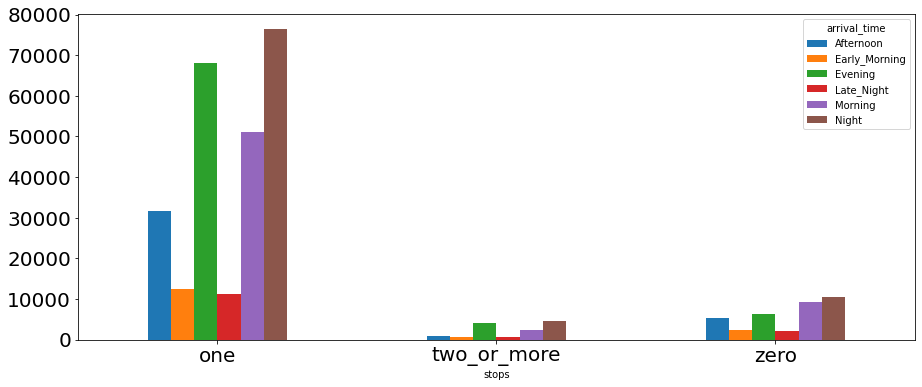

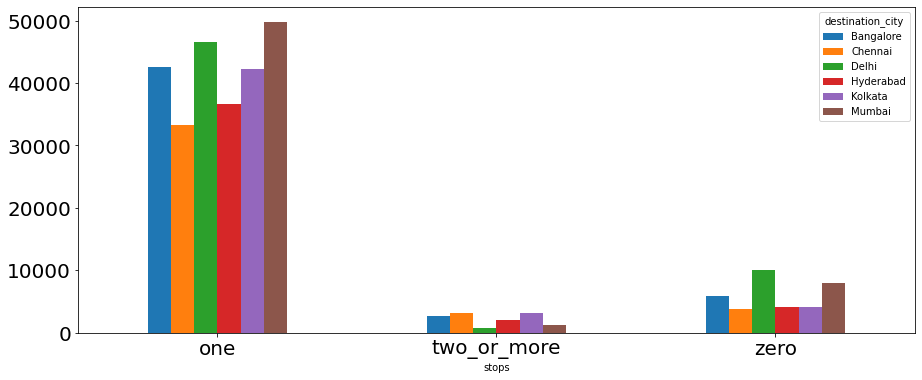

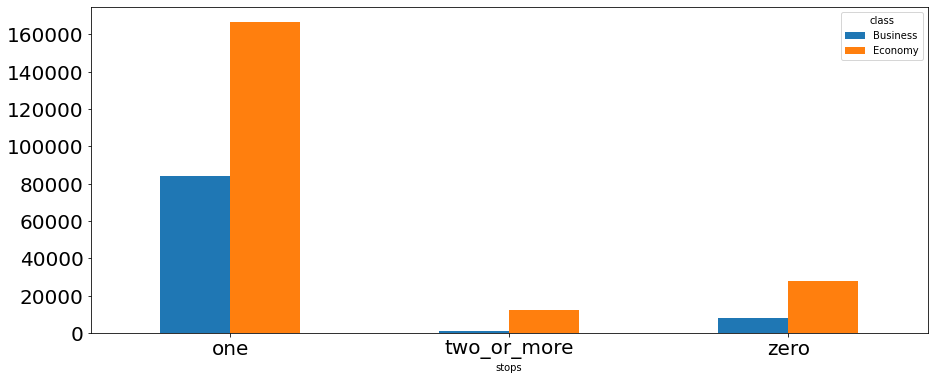

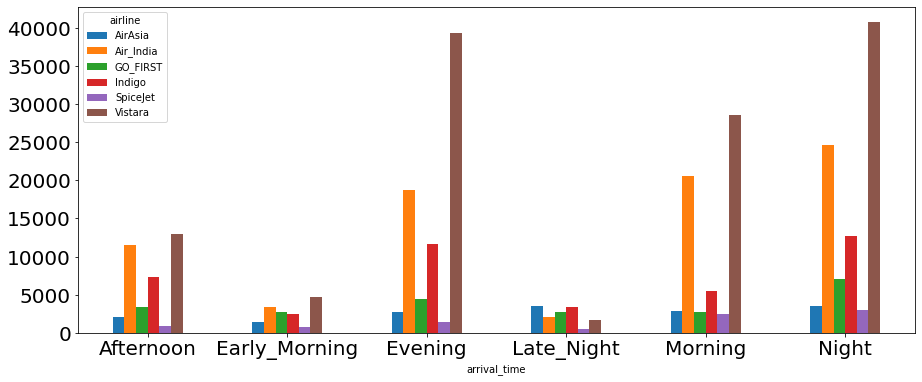

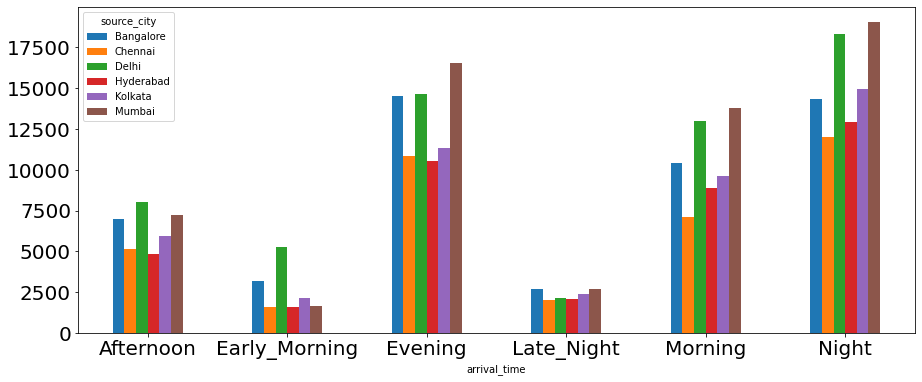

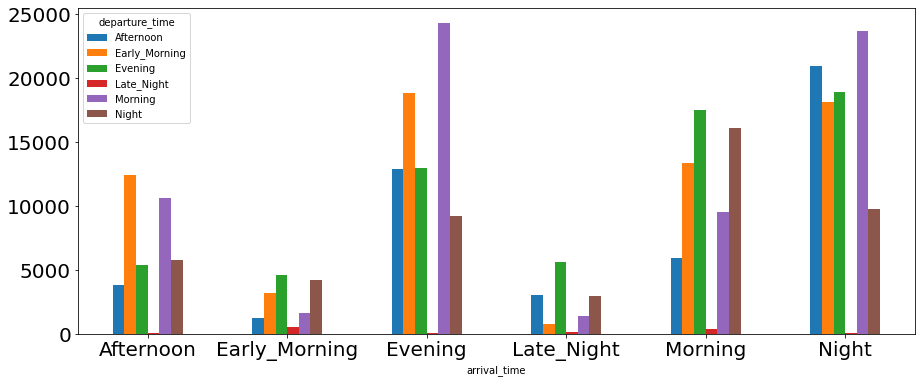

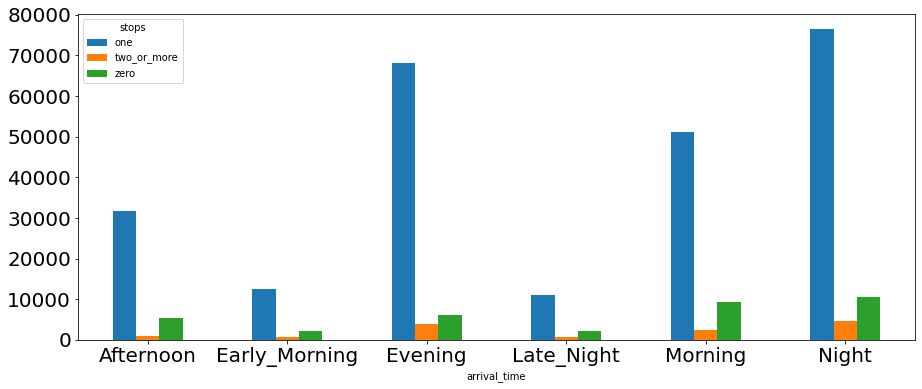

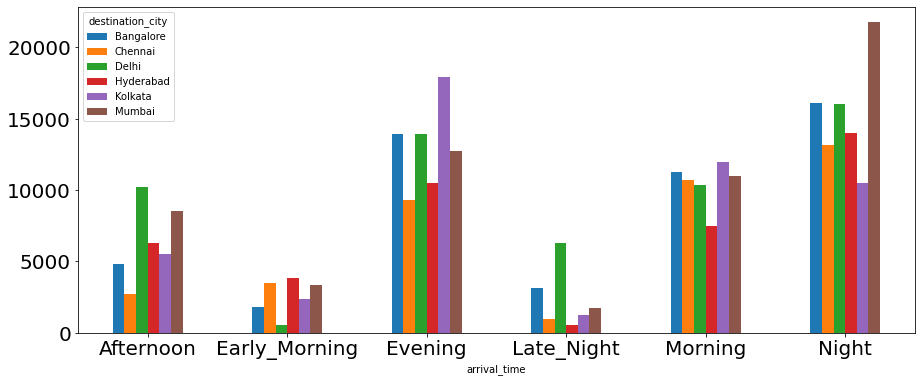

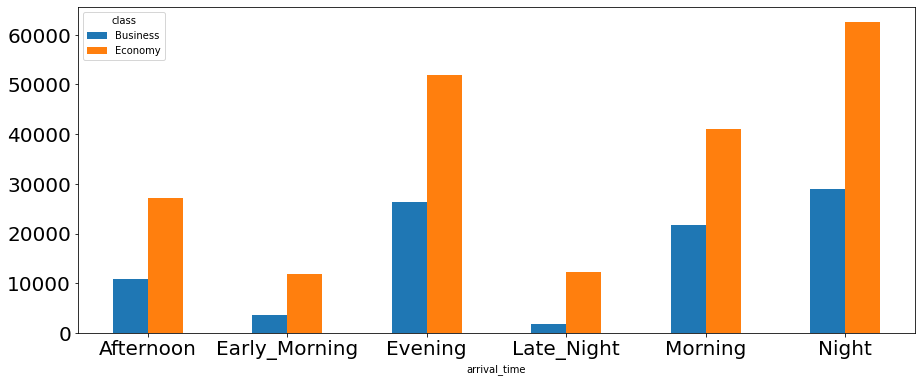

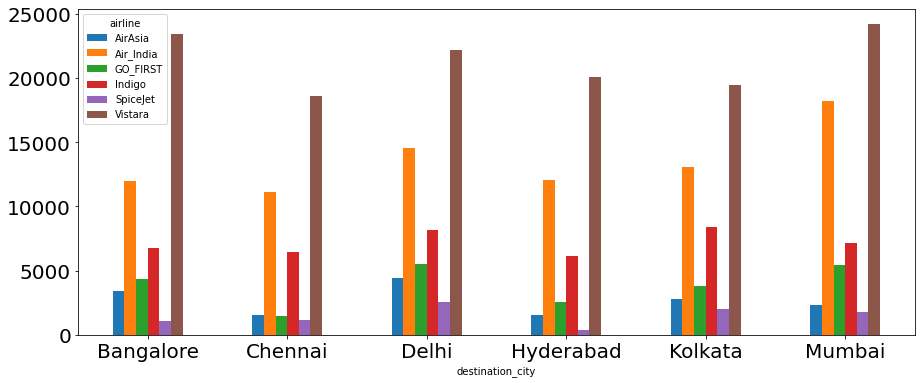

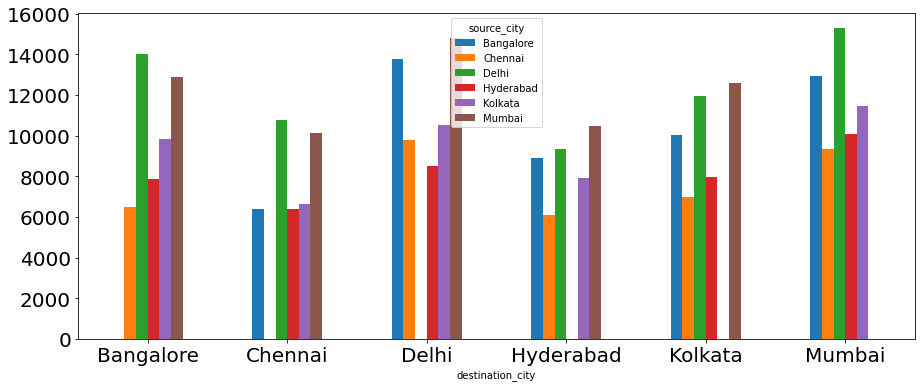

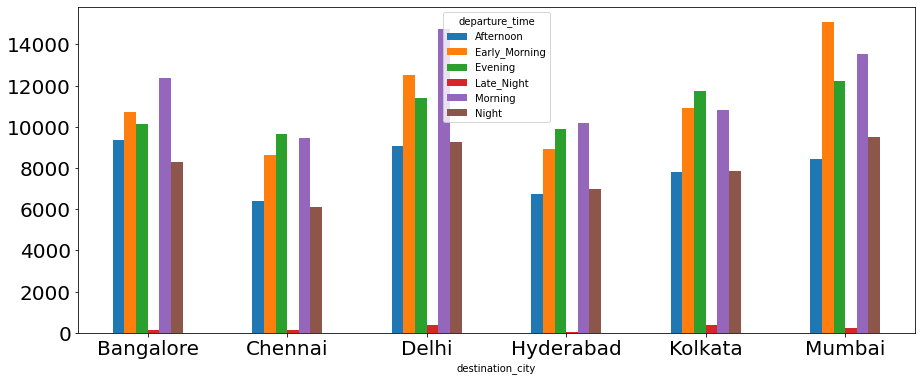

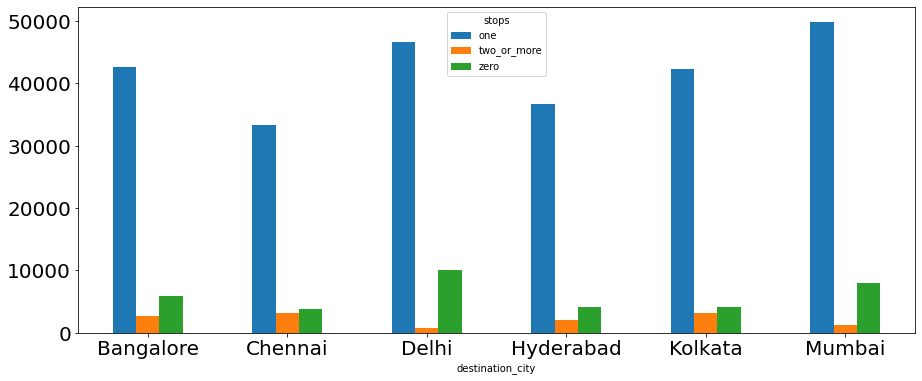

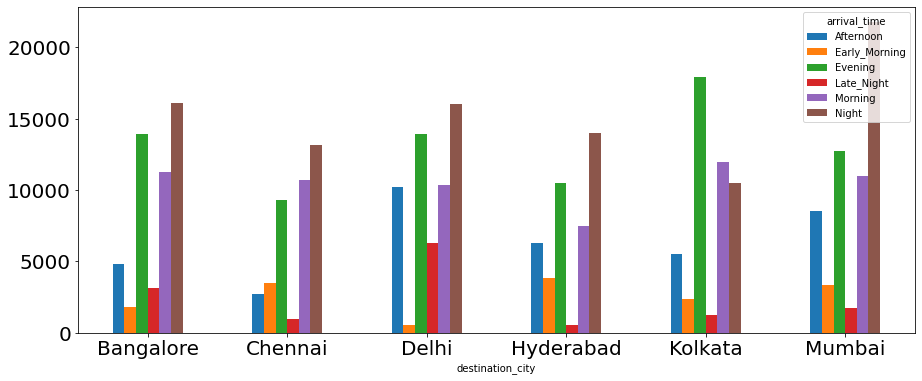

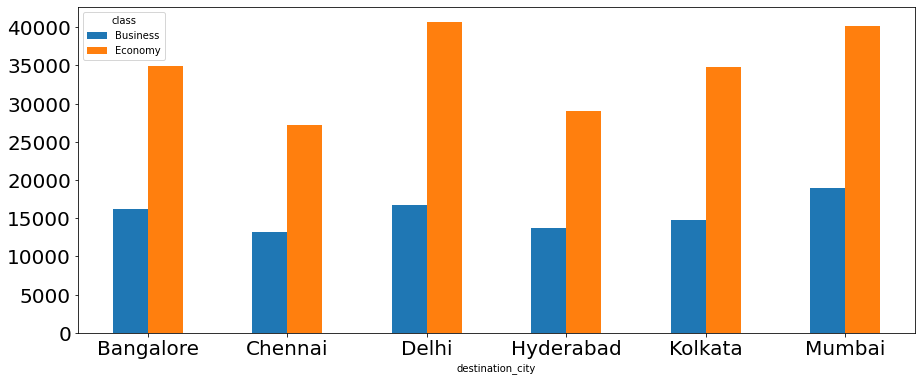

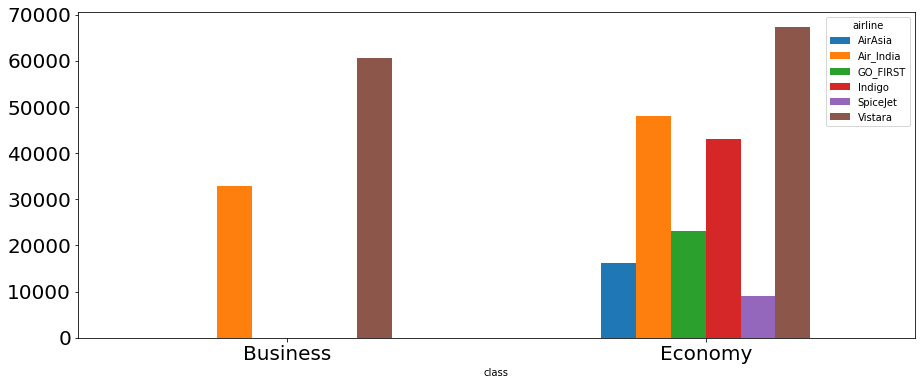

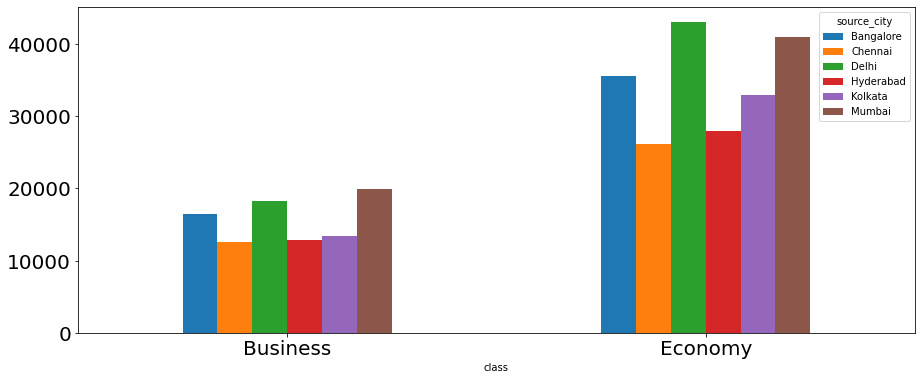

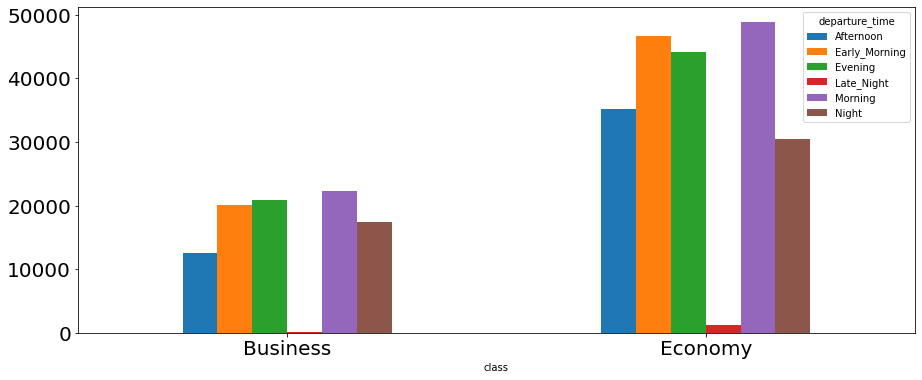

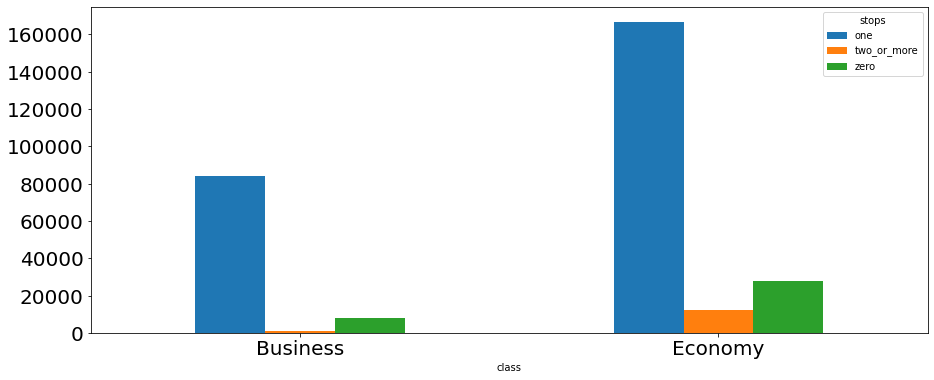

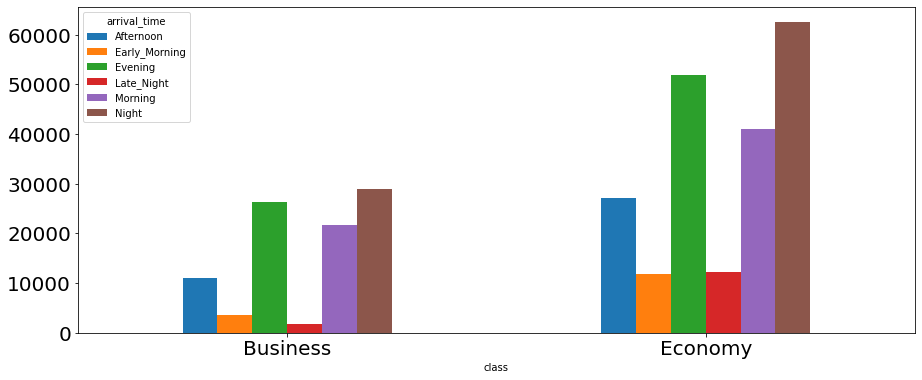

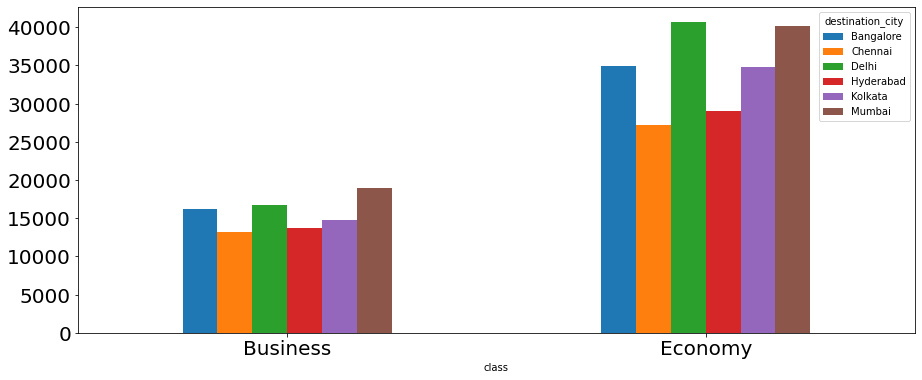

In [59]:
#cat vs cat

for i in cat1:
    for j in cat1:
        if i not in j:
            pd.crosstab(df[i], df[j]).plot(kind="bar", fontsize=20)
            #plt.title(i, "Vs", j, fontsize=20)
            plt.xticks(rotation=0)
            plt.show()

In [60]:
df=df.drop("flight", axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [61]:
num1=num.drop("price")
num1

Index(['duration', 'days_left'], dtype='object')

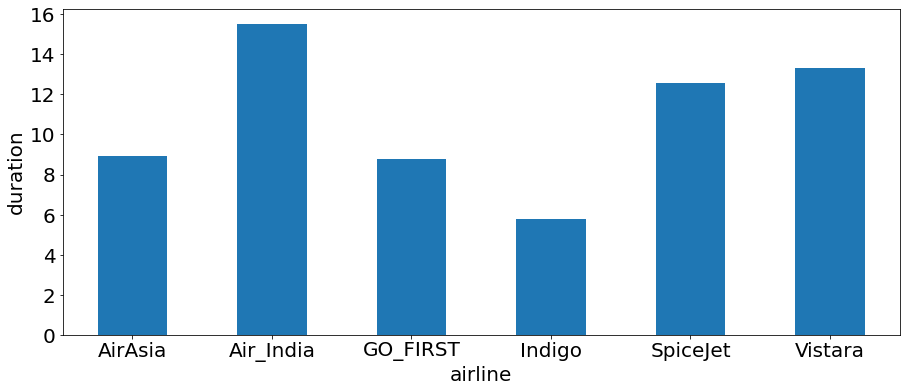

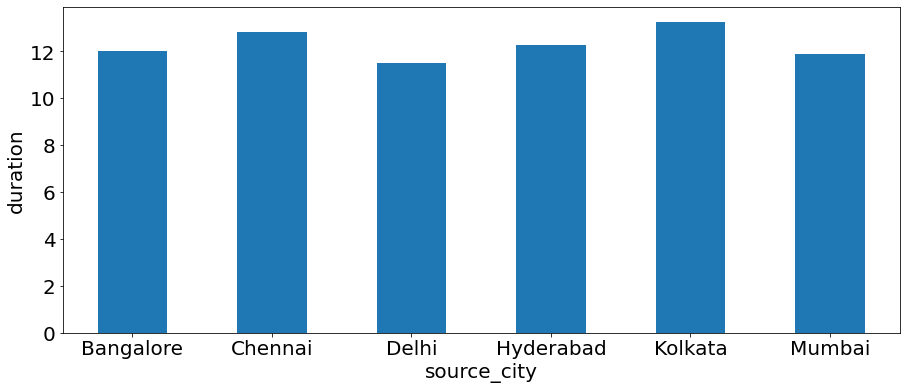

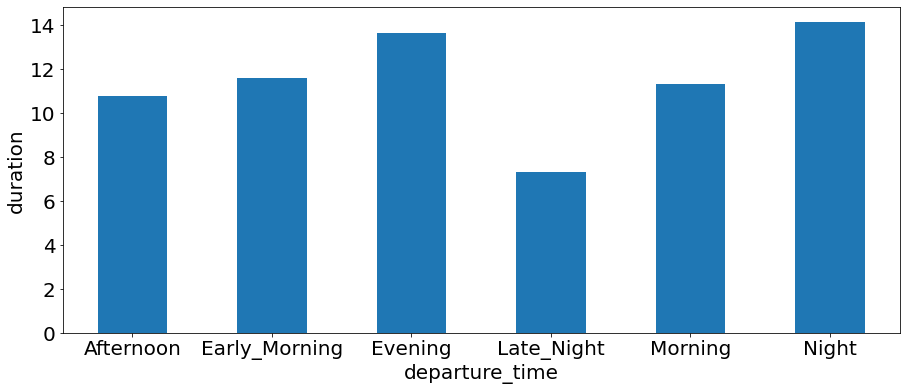

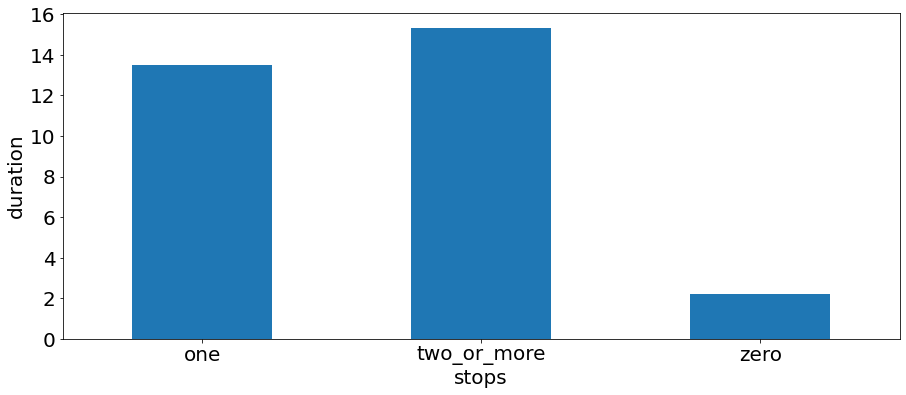

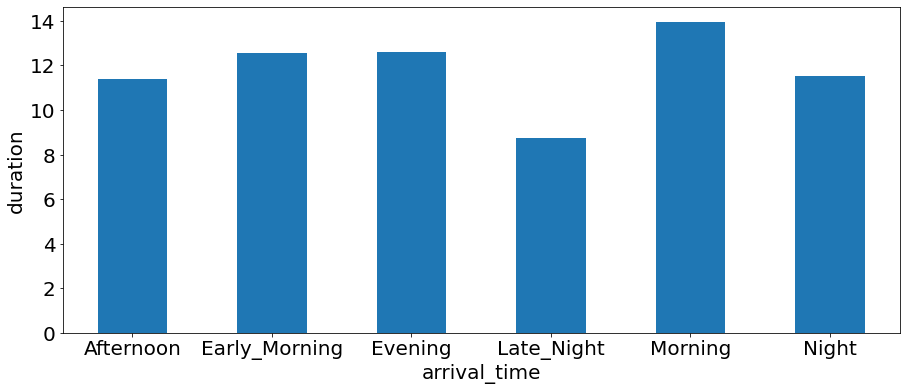

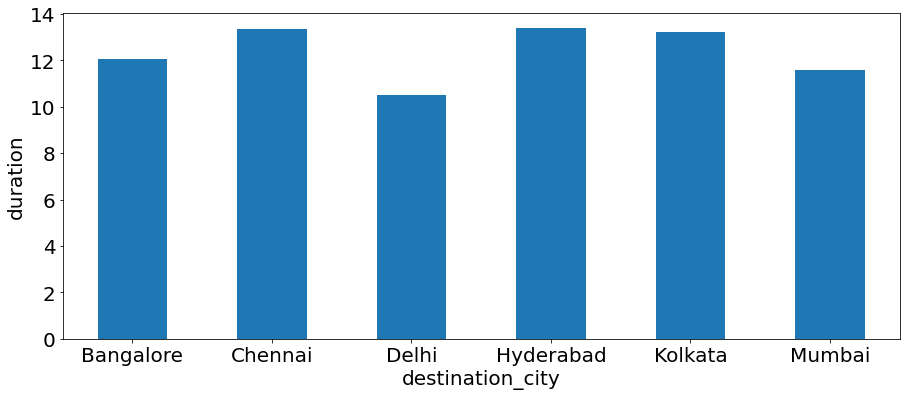

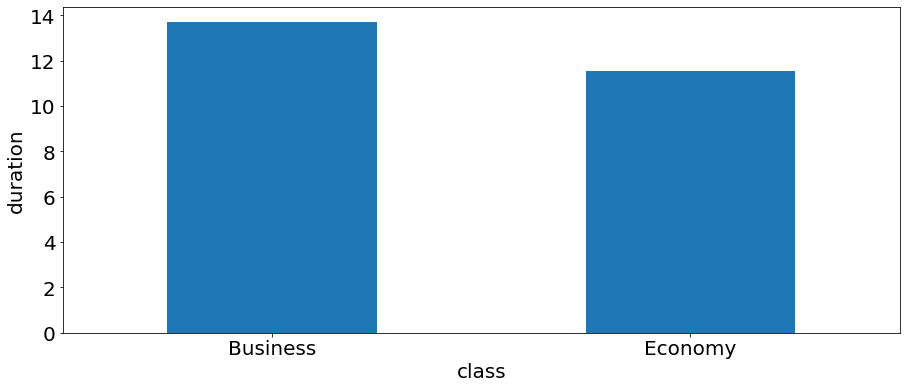

In [62]:
#cat vs numerical

for j in cat1:
    df.groupby(j)["duration"].mean().plot(kind="bar", fontsize=20)
    plt.xlabel(j, fontsize=20)
    plt.ylabel("duration", fontsize=20)
    plt.xticks(rotation=0)
    plt.show()                   

<AxesSubplot:>

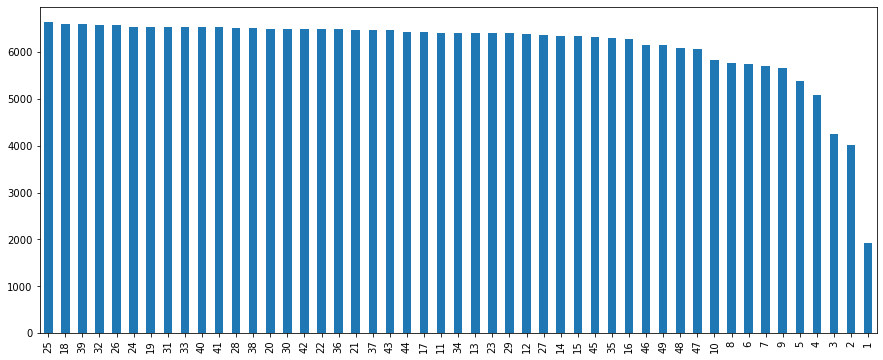

In [63]:
df["days_left"].value_counts().plot(kind="bar") #doesnt make sense

In [64]:
#feature engineering

df["days_left_cat"]= pd.cut(df["days_left"], bins=(0,10,20,30,40,50), labels=["<10 days","<20 days","<30 days","<40 days","<50 days"])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,<10 days
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,<10 days
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,<10 days
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,<10 days
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,<10 days


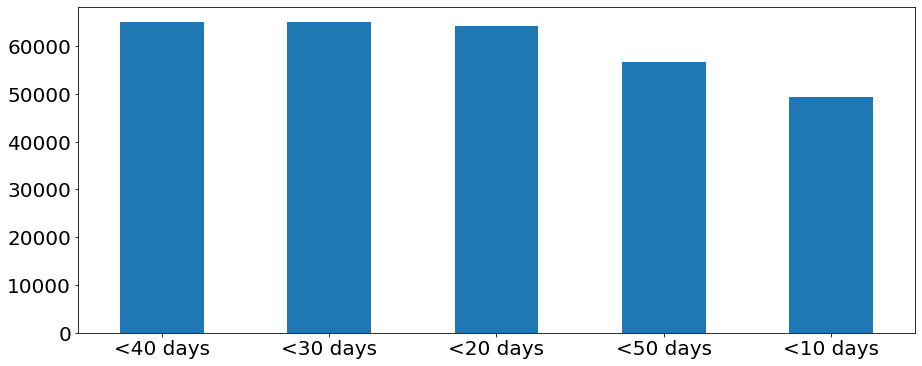

In [65]:
df["days_left_cat"].value_counts().plot(kind="bar",fontsize=20 )
plt.xticks(rotation=0)
plt.show()

In [66]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'days_left_cat'],
      dtype='object')

In [67]:
col=df.columns.drop(["price","days_left","duration"])
col

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'days_left_cat'],
      dtype='object')

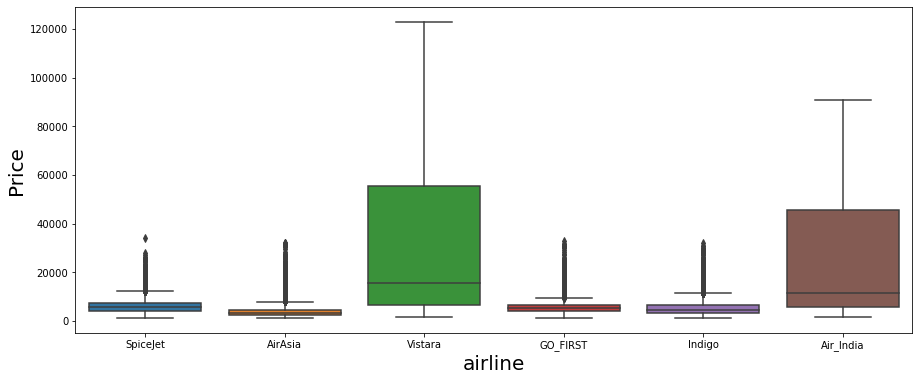

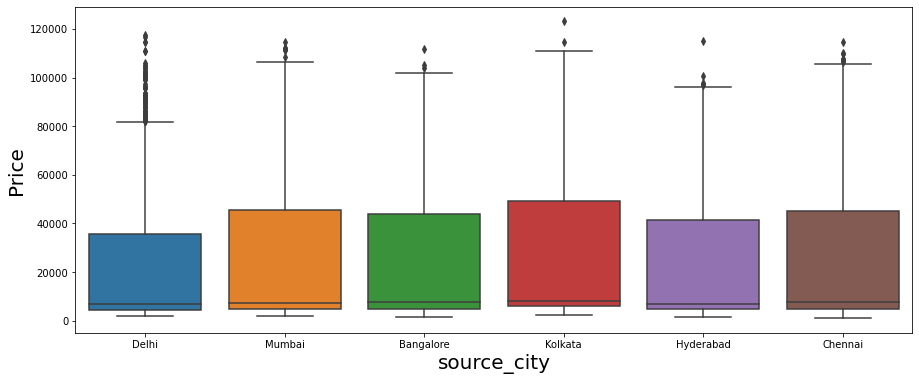

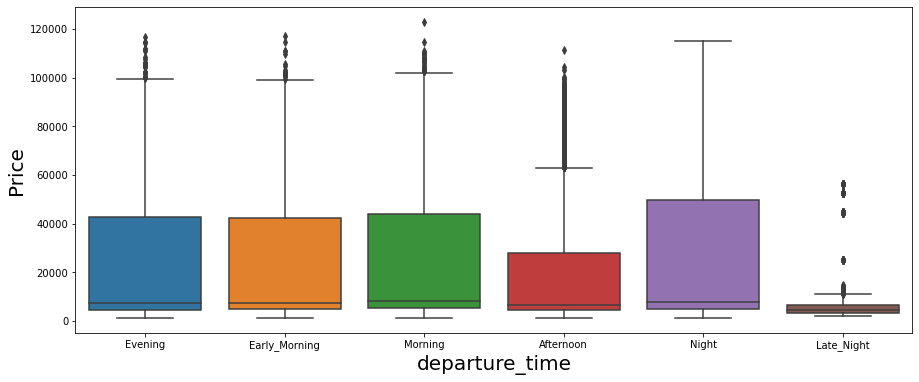

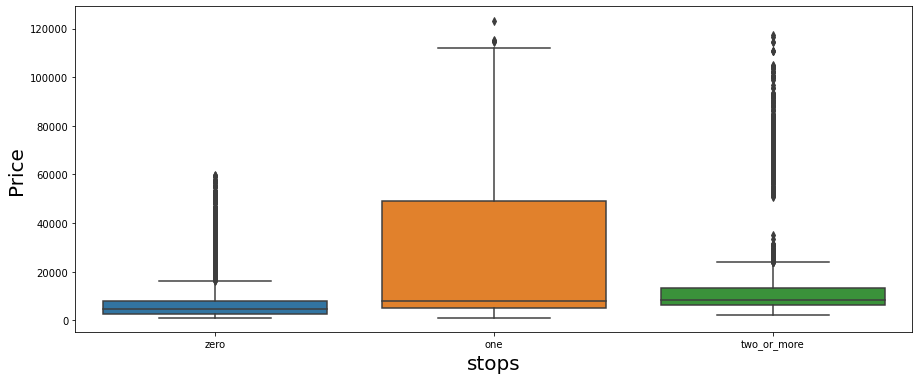

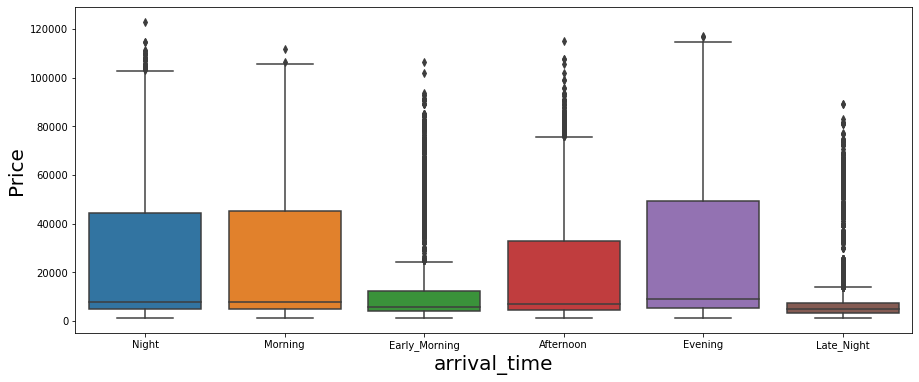

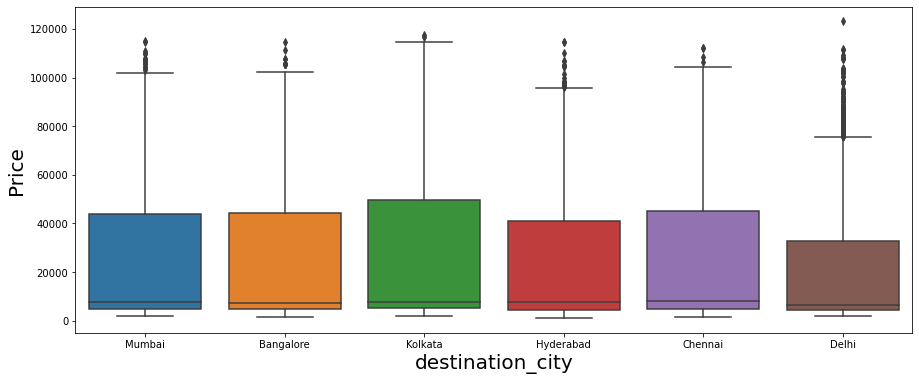

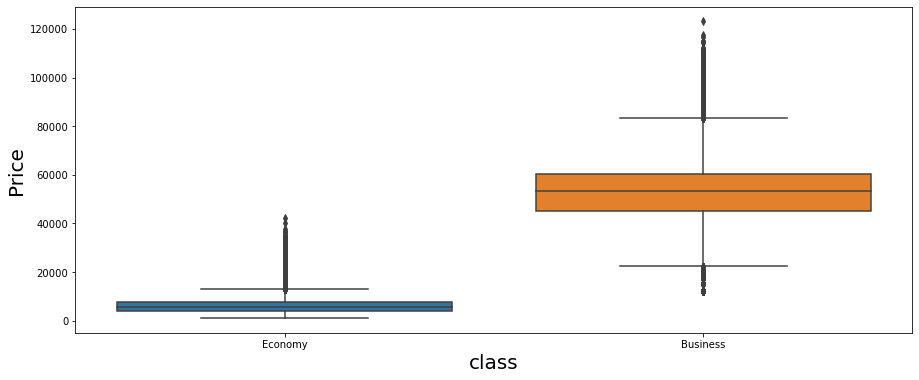

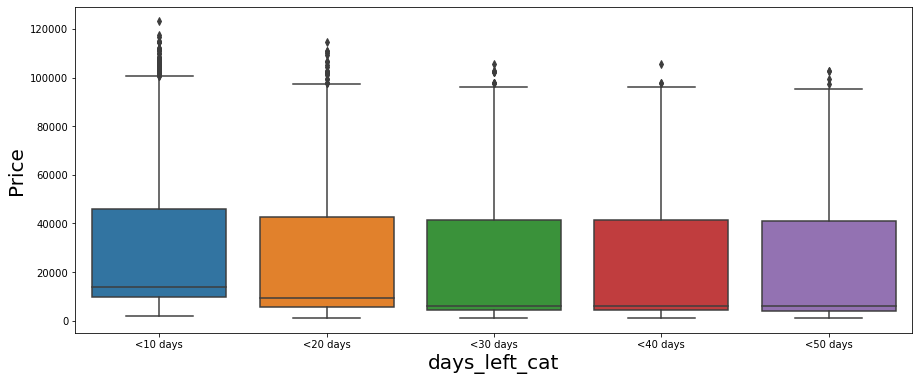

In [68]:
#cat vs target

for i in col:
    sns.boxplot(df[i], df["price"])
    plt.xlabel(i, fontsize=20)
    plt.ylabel("Price", fontsize=20)
    plt.xticks(rotation=0)
    plt.show()
    plt.show()

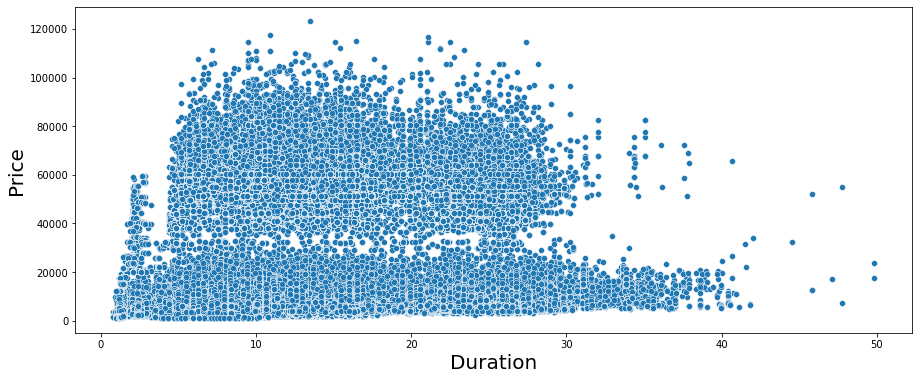

In [69]:
#num vs target
sns.scatterplot(df["duration"], df["price"])
plt.xlabel("Duration", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.xticks(rotation=0)
plt.show()

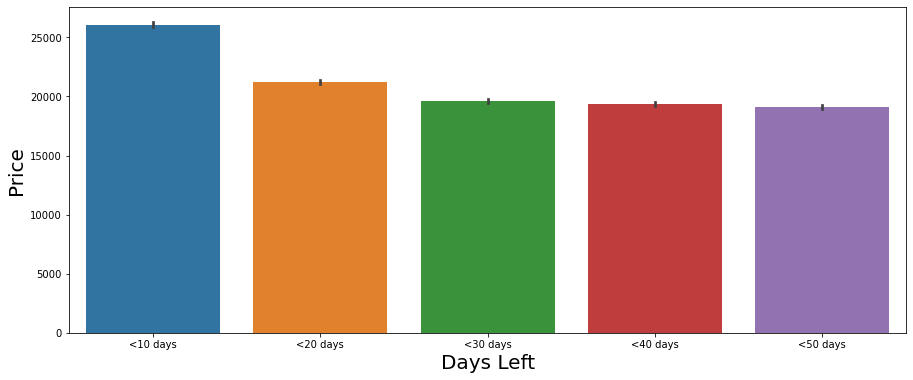

In [70]:
sns.barplot(df["days_left_cat"], df["price"])
plt.xlabel("Days Left", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.xticks(rotation=0)
plt.show()

In [71]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,<10 days
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,<10 days
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,<10 days
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,<10 days
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,<10 days


In [72]:
#encoding

x=df.drop(["price","days_left"], axis=1)
y=df["price"]

x.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left_cat
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,<10 days
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,<10 days
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,<10 days
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,<10 days
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,<10 days


In [73]:
x["days_left_cat"].unique()

['<10 days', '<20 days', '<30 days', '<40 days', '<50 days']
Categories (5, object): ['<10 days' < '<20 days' < '<30 days' < '<40 days' < '<50 days']

In [74]:
x["stops"]=x["stops"].map({'zero':0, 'one':1, 'two_or_more':2})
x["class"]=x["class"].map({'Economy':0, 'Business':1})
x["days_left_cat"]=x["days_left_cat"].map({'<10 days':0, '<20 days':1, '<30 days':3, '<40 days':4, '<50 days':5})
x.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left_cat
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,5
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,5
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,5
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,5
300152,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,5


Text(0.5, 1.0, 'Airline Vs Source City')

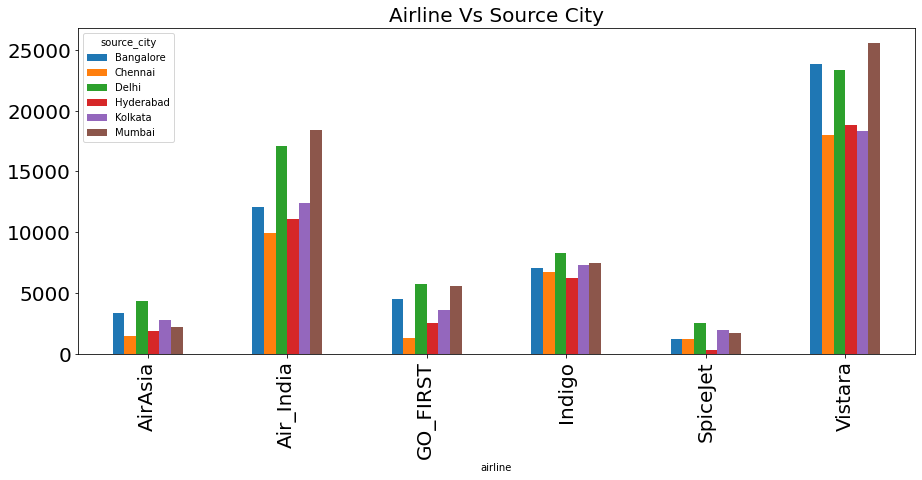

In [75]:
pd.crosstab(df["airline"],df["source_city"]).plot(kind="bar", fontsize=20)
plt.title("Airline Vs Source City", fontsize=20)

In [76]:
df["days_left_cat"]= pd.cut(df["days_left"], bins=(0,10,20,30,40,50), labels=["<10 days","<20 days","<30 days","<40 days","<50 days"])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_left_cat
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,<10 days
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,<10 days
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,<10 days
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,<10 days
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,<10 days


In [77]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'days_left_cat'],
      dtype='object')

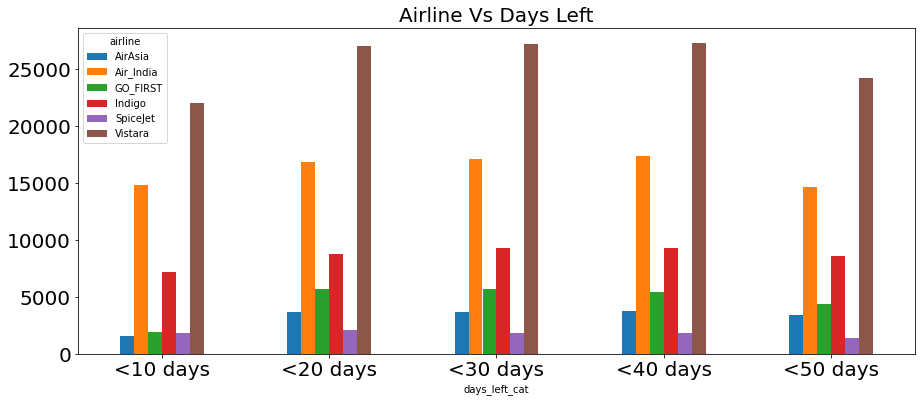

In [78]:
pd.crosstab(df["days_left_cat"],df["airline"]).plot(kind="bar", fontsize=20)
plt.title("Airline Vs Days Left", fontsize=20)
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:ylabel='source_city'>

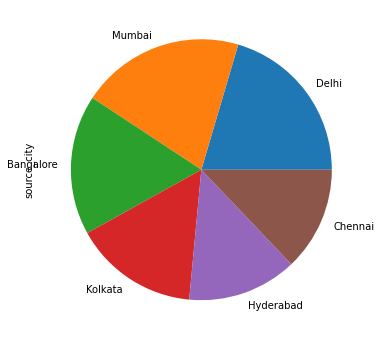

In [79]:
df["source_city"].value_counts().plot(kind="pie")

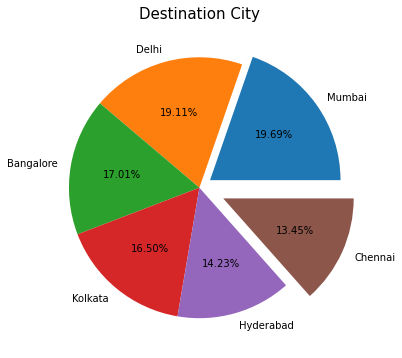

In [80]:
plt.pie(df["destination_city"].value_counts(),labels=[ 'Mumbai', 'Delhi','Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'], 
        autopct="%.2f%%", explode=[0.1,0,0,0,0,0.2])
plt.title("Destination City", fontsize=15)
plt.show()

In [81]:
df["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

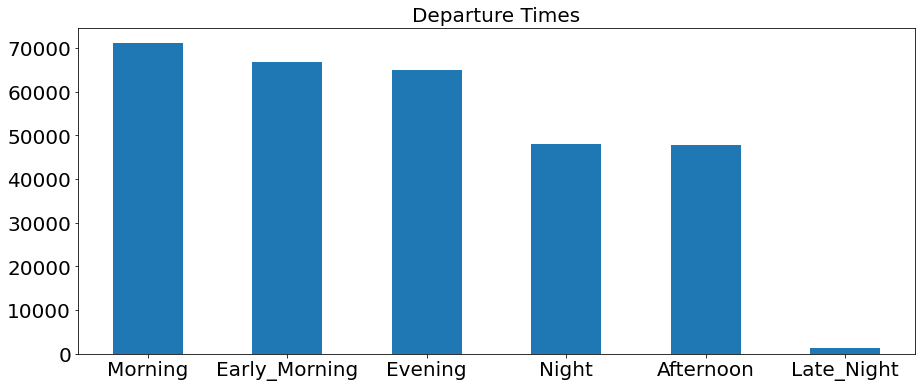

In [83]:
df["departure_time"].value_counts().plot(kind="bar", fontsize=20)
plt.title("Departure Times", fontsize=20)
plt.xticks(rotation=0)
plt.show()